# Семинар по трехмерной геометрии и градиентному спуску

### Визуализация функции от двух переменных

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

In [25]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

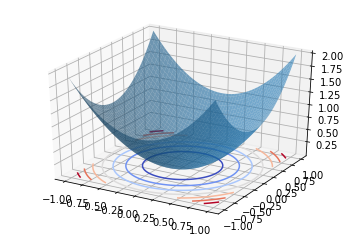

In [3]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Круги на плоскости показывают проекции линий уровня поверхности.

Нарисуйте плоскость $y = x_1 + 2 x_2 + 3$:

AttributeError: 'int' object has no attribute 'min'

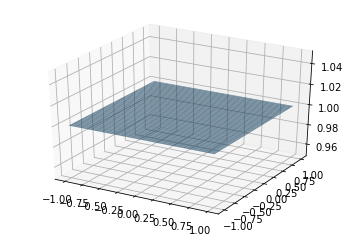

In [7]:
# your code here
fun = lambda x1, x2: 1
plot_3d(fun)

Нарисуйте плоскость, параллельную любой из горизонтальных осей:

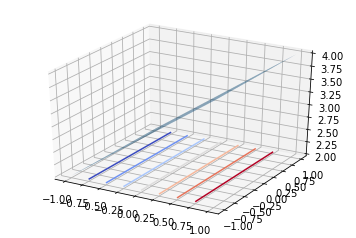

In [5]:
# your code here
plot_3d(lambda x1,x2: x1+3)

Нарисуйте плоскость, проходящую через начало координат:

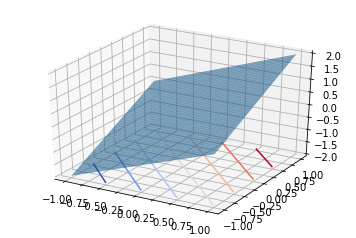

In [6]:
# your code here
plot_3d(lambda x1,x2: x1 + x2)

### Вычисление градиентов функции

Градиент функции $f(x) = f(x_1, \dots, x_d)$ от многих переменных - это вектор ее частных производных.
$$\nabla_x f = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_1} \biggr )$$

Разберем два простых примеры вычисления градиента в случае функции от двух переменных.

__Теоретическая задача 1.__ Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (c_1, c_2)$$

Если непонятно, можно взять конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. 

__Теоретическая задача 2.__ Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Наша следующая цель - найти этот минимум с помощью градиентного спуска. 

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай любых коэффициентов:

In [26]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Теперь надо реализовать ее градиент. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [27]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    ### your code here
    return np.array([2*x1*c1, 2*c2*x2])

Проверьте правильность (сверьте с формулой):

In [10]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([ 2.,  9.])

Теперь реализуем градиентны спуск. 
Он работает следующим образом: 
1. сначала инициализируется начальная точка x (это уже сделано)
1. затем повторяются итерации:
$$x = x - \alpha \nabla f x$$
Здесь $\alpha$ - длина шага.

Допишите функцию согласно описанию:

In [36]:
def grad_descend(grad_fun, step_size=0.1, num_steps=20):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    x = np.random.rand(2) * 4 - 2
    ### your code here
    iters = [x,]
    for i in range(num_steps):
        iters.append(iters[i] - step_size * grad_fun(iters[i][0],iters[i][1]))
    return np.array(iters)
    

Протестируем функцию (последний элемент должен быть близок к 0):

In [58]:
trace = grad_descend(grad_fun)
trace

array([[-1.41297644, -1.63064562],
       [-1.13038115, -1.3045165 ],
       [-0.90430492, -1.0436132 ],
       [-0.72344394, -0.83489056],
       [-0.57875515, -0.66791245],
       [-0.46300412, -0.53432996],
       [-0.3704033 , -0.42746397],
       [-0.29632264, -0.34197117],
       [-0.23705811, -0.27357694],
       [-0.18964649, -0.21886155],
       [-0.15171719, -0.17508924],
       [-0.12137375, -0.14007139],
       [-0.097099  , -0.11205711],
       [-0.0776792 , -0.08964569],
       [-0.06214336, -0.07171655],
       [-0.04971469, -0.05737324],
       [-0.03977175, -0.04589859],
       [-0.0318174 , -0.03671888],
       [-0.02545392, -0.0293751 ],
       [-0.02036314, -0.02350008],
       [-0.01629051, -0.01880006]])

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

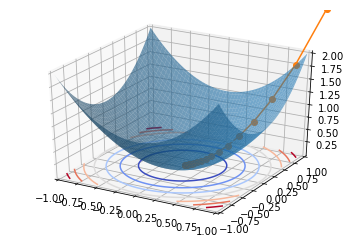

In [38]:
### your code here
plot_3d(fun,trace=trace)

Может потребоваться запустить ячейку пару раз, чтобы траекторию было лучше видно.

Запустите оптимизацию несколько раз, чтобы посмотреть, как ведет себя процесс в зависимости от начального приближения:

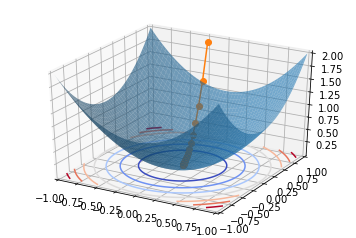

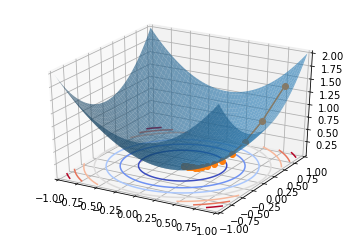

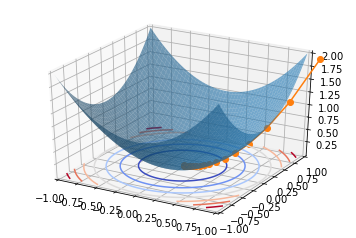

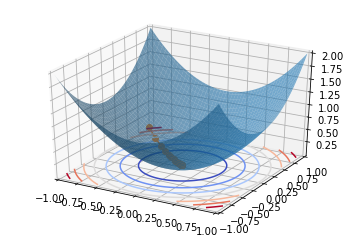

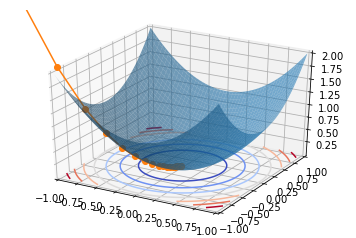

In [39]:
### your code here
for i in range(5):
    trace = grad_descend(grad_fun)
    plot_3d(fun,trace=trace)

Попробуйте разную длину шага (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

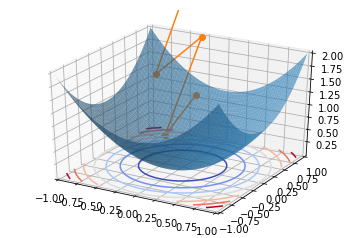

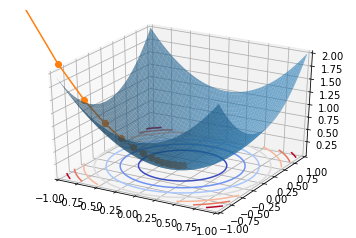

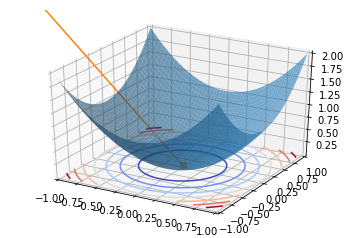

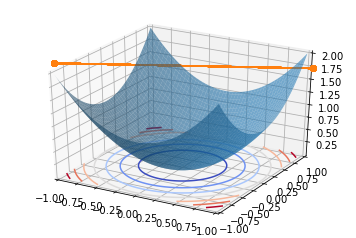

In [47]:
### your code here
np.random.seed(1)
for i in [1.1,0.1,0.5,1]:
    trace = grad_descend(grad_fun,step_size=i,num_steps=50)
    plot_3d(fun,trace=trace)

При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

Наконец, попробуем использовать другие коэффициенты. Оптимизируйте функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага (0.1, 0.2, 0.5):

In [48]:
### your code here
fun = lambda x1,x2: x1**2 + 5 * x2**2

"Вытянутую" функцию сложнее оптимизировать. Именно поэтмоу данные рекомендуется нормировать перед обучением модели, чтобы избежать таких колебаний при оптимизации.

In [56]:
np.random.seed(1)
for i in [0.199,0.2,0.5]:
    trace = grad_descend(grad_fun,step_size=i,num_steps=20)
    
    plot_3d(fun,trace=(trace-trace.mean) )

TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'